# What parameters to choose for the IQ ?
## Goal of this code

This code describes a visual method to parametize the Image Quilting process to create small random variations within pictures. This step is necessary before creating thousands of synthetic time series and find out that the IQ is not parametized well. 

The parameters that have an influence on the creation of variations within pictures are many but the significant ones are :
- the blur of the auxilliary variable. Normally the blurrier the image is, the bigger the variations are. This parameter must be an odd number that will represents the kernel size for the gaussian blur.
- the size of the overlap. The bigger the overlap is, the smoother the transitions between tiles will be. This parameter is a couple of numbers between 0 and 1 represneting the fraction of the tile that is overlaped.
- the size of the tile. If the tile is quite big, the program will not generate variations smaller than this size. This parameter is a couple of integers representing the number of pixels of the tile size.

## How does this code work ?

The process is simple :
1. We create a time serie based on pi with some chosen parameters for the IQ. The sentence "time serie based on pi" means that the time serie will have approximately the same modes, at the same time and with the same proportion of images in it as the experimental time serie.
2. We compute the consecutive MHD for the experimental and the synthetic time series. The consecutive MHD is the MHD between every consecutive pair of pictures.
3. We plot the Q-Q plot and the histogram.
4. We do again the steps 1 to 3 until the Q-Q plot is quite of a straight line and the histogram of the synthetic matches quite well the one from the experiment. If the points of the Q-Q plot are above the red line, it means that the IQ is generating too much variations and that we should play with the parameters to reduce those variations.

## The parameters
### For the generation of the synthetic time serie
- `pi` is the pi distribution that we computed before. We should load it by putting the path where it is saved in .npy.
- `folderExp` is the path of the folder where the pictures of the experiment are saved.
- `folderCentroids` is the path of the folder wherethe centroids are saved.
- `folderGeneratedPi` is the path of the folder where we want to save our synthetic time serie.
- `blur`, `overlap` and `tilesize` are the parameters of the IQ that we should change to find the combinaison that creates a nice Q-Q plot.

### For the histogram
- `num_bins` is the number of bins of the histogram. We can change it if necessary for better visualization.

## The functions

All the necessary function can be found in the file `functionsIQ.py`. Here is a small description of each :
- `pngToGslib` creates a .gslib file for every picture in the folder. This file is the main argument of the Image Quilting Julia package.
- `imageQuilting` synthetises a new image based on the name of the training image with the variations parametized by the 3 parameters explained above.
- `consecutiveMHD` computes the MHD between every consecutive pair of pictures stored into the folder.

# Importing the librairies

In [1]:
# Librairies
from os.path import join
import numpy as np
import random
from sklearn.preprocessing import normalize
from PIL import Image
import os
from scipy.optimize import minimize
import cv2
import imageio
import time
from juliacall import Main as jl
import pandas as pd
import matplotlib.pyplot as plt

import functionsIQ as f

# The synthetic time serie

Here, we generate a synthetic time serie based on the pi distribution. This means that the time serie will have approximately the same modes, at the same time and with the same proportion of images in it as the experimental time serie. 

We use the ImageQuilting package from Julio Hoffimann who wrote it in Julia to generate small random variations within pictures. 

Be careful : if an error of type "JuliaError: AssertionError: image not available" occurs, you should go into the `GeoStatsImages` package in the `.julia` folder and open the `GeoStatsImages.jl` as an administrator. Then, you must modify the datadir to be exactly the same from `folderCentroids`. Save the file, restart the kernel of the notebook and run the code again.

In [2]:
# Load the pi distribution
pi = np.load('C:/Users/EPFL-LHE/Documents/Arthur/NPYFiles/FINALDistanceMatrix/pi.npy')

# Folder where the pictures of the experiment
folderExp = 'C:/Users/EPFL-LHE/Documents/Arthur/Experiment-Hoffiman-BW/BW-oneDay'
# Folder where the centroids are saved
folderCentroids = 'C:/Users/EPFL-LHE/Documents/Arthur/Centroids/FINALCentroids'
# Folder where the generated images will be saved
folderGeneratedPi = 'C:/Users/EPFL-LHE/Documents/Arthur/TimeSeries/TimeSerie_Pi/TestFINAL'

# Parameters of the Image Quilting (change those to get a nice Q-Q plot)
blur = 3
overlap = (0.54, 0.54)
tilesize = (23, 15)

# Create the folder to store the generated images if it is not created yet
os.makedirs(folderGeneratedPi, exist_ok=True)

# Get the number of experimental pictures
allFiles = os.listdir(folderExp)
files = [file for file in allFiles]
stepmax = len(files)

# Start the stopwatch
start_time0 = time.time()

# Create a list that tells when to change of modes
changeOfModes = [pi[i]*stepmax for i in range(len(pi))]
changeOfModes = np.cumsum(changeOfModes)

# Create a generated mode list based on pi
k=0
mode_list = []
i = 0
while i<stepmax:
    while i<changeOfModes[k]:
        mode_list.append(k)
        i = i+1
    k=k+1
    
# Get the number of centroids in the folder
allFiles = os.listdir(folderCentroids)
centroid_files = [file for file in allFiles if file.endswith(".png")]
numCentroids = len(centroid_files)

# Get the size of the centroids
centroidName = join(folderCentroids, centroid_files[0])
centroid1 = cv2.imread(centroidName)
l = centroids.shape[0]
c = centroids.shape[1]
TIsize = [l, c]   

# Create the .gslib file for each centroid in the folder
for i in range(numCentroids):
    nom_centroid = join(folderCentroids, centroid_files[i])
    # Create the .gslib file
    f.pngToGslib(nom_centroid)

# Generate stepmax pictures
for k in range(stepmax):
    # Get the name of the centroid for the .gslib file
    TIname = os.path.splitext(os.path.basename(centroid_files[mode_list[k]]))[0]
    # Generate a synthetic picture based on the mode list and on the chosen parameters
    simulated_picture = f.imageQuilting(TIname, TIsize, blur, overlap, tilesize)
    # Convert it to regular format
    simulated_picture = (simulated_picture * 255).astype(np.uint8)
    # Check if working
    print(f"The picture n°{k+1} is generated")
    # Write the image in the folder
    image_path = os.path.join(folderGeneratedPi, f'image_{k:03d}')
    imageio.imwrite(image_path + '.png', simulated_picture)

# Computing the general duration of the code
end_time0 = time.time()
duration0 = end_time0 - start_time0
duration0 = duration0/60
print(f"The whole code took {duration0} minutes to run.")

The picture n°1 is generated
The picture n°2 is generated
The picture n°3 is generated
The picture n°4 is generated
The picture n°5 is generated
The picture n°6 is generated
The picture n°7 is generated
The picture n°8 is generated
The picture n°9 is generated
The picture n°10 is generated
The picture n°11 is generated
The picture n°12 is generated
The picture n°13 is generated
The picture n°14 is generated
The picture n°15 is generated
The picture n°16 is generated
The picture n°17 is generated
The picture n°18 is generated
The picture n°19 is generated
The picture n°20 is generated
The picture n°21 is generated
The picture n°22 is generated
The picture n°23 is generated
The picture n°24 is generated
The picture n°25 is generated
The picture n°26 is generated
The picture n°27 is generated
The picture n°28 is generated
The picture n°29 is generated
The picture n°30 is generated
The picture n°31 is generated
The picture n°32 is generated
The picture n°33 is generated
The picture n°34 is

# The consecutive MHD

Once the synthetic time serie is created, we can compute the consecutive MHD for both time series. As before, the `consecutiveMHD` function converts the images into edges with a Julia function and calculates the modified Hausdorff distance between two edges using the Julia package from Hoffimann.

In [3]:
# Compute the consecutive MHD for the experiment and the synthetic time serie
MHDExp = f.consecutiveMHD(folderExp)
MHDSynth = f.consecutiveMHD(folderGeneratedPi)

# The comparison with the experimental time serie

## The Q-Q plot

This plot allows us to see if the distribution of consecutive MHD for the synthetic time serie is the same as the experimental time serie. If the points are aligned onto the first bisector, the two distributions are the same. 

If there are a lot of points grouped together with small value of MHD and just a few with big MHD, we think it is relevant to look just for the small MHD as they are only parametized by the IQ. In fact, the big values of MHD correspond to the change of modes which is not what we want to compare.

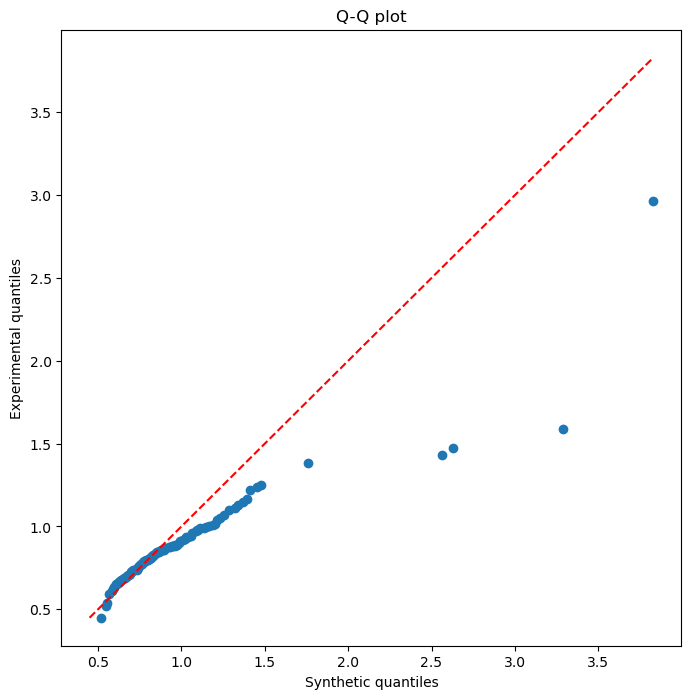

In [8]:
# Computes quantiles
synth_quantiles = np.percentile(MHDSynth, range(0, 101)) 
exp_quantiles = np.percentile(MHDExp, range(0, 101))  

# Plot the Q-Q plot
plt.figure(figsize=(8,8))
plt.plot(synth_quantiles, exp_quantiles, 'o')
plt.plot([np.min((np.min(synth_quantiles), np.min(exp_quantiles))), np.max((np.max(synth_quantiles), np.max(exp_quantiles)))],[np.min((np.min(synth_quantiles), np.min(exp_quantiles))), np.max((np.max(synth_quantiles), np.max(exp_quantiles)))], 'r--')
plt.xlabel('Synthetic quantiles')
plt.ylabel('Experimental quantiles')
plt.title('Q-Q plot')
plt.show()

## The histogram

The histogram is also a good way for seeing if two distributions look alike. We simply want the synthetic histogram to match the more as possible the experimental one.

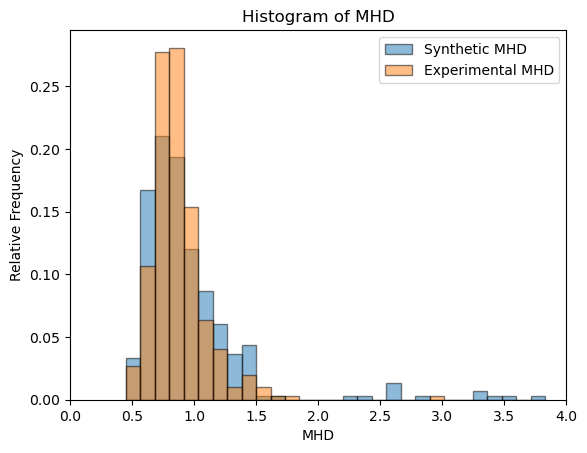

In [7]:
# Define the number of bins
num_bins = 30

# Define the limits for the bins
bins = np.linspace(min(min(MHDSynth), min(MHDExp)), 
                   max(max(MHDSynth), max(MHDExp)), 
                   num_bins)

# Create a figure and an ax
fig, ax = plt.subplots()

# Compute the weights for the axis
weights_syn = np.ones_like(MHDSynth) / len(MHDSynth)
weights_exp = np.ones_like(MHDExp) / len(MHDExp)

# Create the histograms
ax.hist(MHDSynth, bins, alpha=0.5, label='Synthetic MHD', edgecolor='black', weights=weights_syn)
ax.hist(MHDExp, bins, alpha=0.5, label='Experimental MHD', edgecolor='black', weights=weights_exp)

# Esthetic
plt.xlabel('MHD')
plt.ylabel('Relative Frequency')
plt.title('Histogram of MHD')
plt.legend()
x_ticks = np.arange(0, 4.5, 0.5)
plt.xticks(x_ticks)
plt.show()


# Conclusion

Once we are happy with our Q-Q plot, we can remember the parameters used for the Image Quilting and use them in the next part for the generation of multiple time series.